In [1]:
import tensorflow as tf 
import numpy as np
import pandas as pd 
from tensorflow import keras
import os

In [2]:
image_size = 220
batch_size = 10


target_size = (image_size, image_size)
input_shape = (image_size, image_size, 3)

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [4]:
train_datagen = ImageDataGenerator(rescale = 1/255)
train_generator = train_datagen.flow_from_directory('./Wound types',target_size=(200,200),batch_size=batch_size,classes =['Bruises','Burns', 'Cut','Laceration','Stab_wound'],class_mode = 'categorical')


Found 315 images belonging to 5 classes.


In [5]:
for image_batch,label_batch in train_generator:
    break 

print(image_batch.shape,label_batch.shape)

(10, 200, 200, 3) (10, 5)


In [6]:
print(train_generator.class_indices)

{'Bruises': 0, 'Burns': 1, 'Cut': 2, 'Laceration': 3, 'Stab_wound': 4}


In [7]:
model = tf.keras.models.Sequential([
    # The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(220, 220, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    # 128 neuron in the fully-connected layer
    tf.keras.layers.Dense(128, activation='relu'),
    # 5 output neurons for 5 classes with the softmax activation
    tf.keras.layers.Dense(5, activation='softmax')

])

C:\Users\bhuva\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 218, 218, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 109, 109, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 107, 107, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 51, 51, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 23, 23, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 9, 9, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 229,285 (895.64 KB)

 Trainable params: 229,285 (895.64 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['acc'])

In [10]:
total_sample = train_generator.n
n_epochs = 30

In [11]:
history = model.fit(
        train_generator, 
        steps_per_epoch = int(total_sample/batch_size),  
        epochs = n_epochs,
        verbose = 1)

Epoch 1/30


C:\Users\bhuva\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - acc: 0.3690 - loss: 1.7072
Epoch 2/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - acc: 0.2000 - loss: 0.8487
Epoch 3/30


c:\Program Files\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - acc: 0.2823 - loss: 1.5314
Epoch 4/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step - acc: 0.4000 - loss: 0.7550
Epoch 5/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - acc: 0.4016 - loss: 1.4896
Epoch 6/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step - acc: 0.3000 - loss: 1.1064
Epoch 7/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - acc: 0.3986 - loss: 1.4287
Epoch 8/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 252us/step - acc: 0.7000 - loss: 0.6534
Epoch 9/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - acc: 0.5157 - loss: 1.2962
Epoch 10/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step - acc: 0.4000 - loss: 0.8462
Epoch 11/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - acc: 0.4925 - loss: 1.2644
Epoch 12/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 265us/step - acc: 0.6000 - loss: 0.4667
Epoch 13/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - acc: 0.5754 - loss: 1.1626
Epoch 14/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - acc: 0.4000 - loss: 0.6519
Epoch 15/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 2

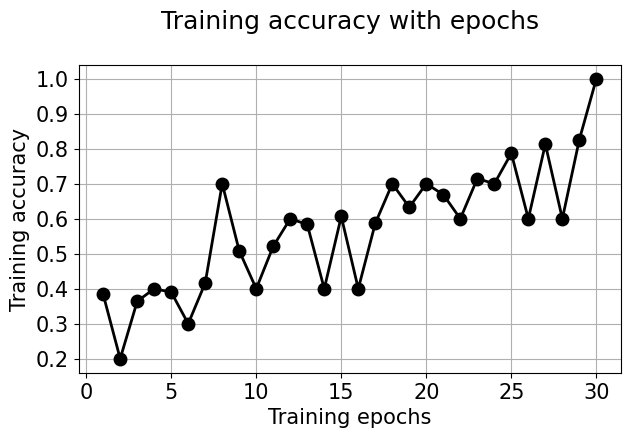

In [12]:
import matplotlib.pyplot as plt


plt.figure(figsize=(7,4))
plt.plot([i+1 for i in range(n_epochs)],history.history['acc'],'-o',c='k',lw=2,markersize=9)
plt.grid(True)
plt.title("Training accuracy with epochs\n",fontsize=18)
plt.xlabel("Training epochs",fontsize=15)
plt.ylabel("Training accuracy",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [13]:
model.save('my_model.h5')

In [15]:
model.save(filepath="save_model/model.h5")
